Open Machine Learning Course 

# <center> Home Task 1. Exploratory data analysis with Pandas
## <center>Practice. Analyzing "Titanic" passengers

**Fill in the missing code ("You code here")**

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option("display.precision", 2)

**Read data into a Pandas DataFrame**

In [118]:
data = pd.read_csv("titanic_train.csv", index_col="PassengerId")

**First 5 rows**

In [119]:
data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.92,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


In [120]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,714.00,891.00,891.00,891.00
mean,0.38,2.31,29.70,0.52,0.38,32.20
std,0.49,0.84,14.53,1.10,0.81,49.69
min,0.00,1.00,0.42,0.00,0.00,0.00
25%,0.00,2.00,20.12,0.00,0.00,7.91
50%,0.00,3.00,28.00,0.00,0.00,14.45
75%,1.00,3.00,38.00,1.00,0.00,31.00
max,1.00,3.00,80.00,8.00,6.00,512.33


**Let's select those passengers who embarked in Cherbourg (Embarked=C) and paid > 200 pounds for their ticker (fare > 200).**

Make sure you understand how actually this construction works.

In [121]:
data[(data["Embarked"] == "C") & (data.Fare > 200)].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.52,B58 B60,C
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.33,NaN,C
300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.52,B58 B60,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.38,B57 B59 B63 B66,C
378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.50,C82,C


**We can sort these people by Fare in descending order.**

In [122]:
data[(data["Embarked"] == "C") & (data["Fare"] > 200)].sort_values(
    by="Fare", ascending=False
).head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.33,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.33,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.33,B101,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.38,B57 B59 B63 B66,C
743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.38,B57 B59 B63 B66,C


**Let's create a new feature.**

In [123]:
def age_category(age):
    """
    < 30 -> 1
    >= 30, <55 -> 2
    >= 55 -> 3
    """
    if age < 30:
        return 1
    elif age < 55:
        return 2
    elif age >= 55:
        return 3

In [124]:
age_categories = [age_category(age) for age in data.Age]
data["Age_category"] = age_categories

**Another way is to do it with `apply`.**

In [125]:
data["Age_category"] = data["Age"].apply(age_category)

**1. How many men/women were there onboard?**

In [126]:
# You code here
male_pattern = (data['Sex'] == 'male')
female_pattern = (data['Sex'] == 'female')

men_count = len(data[male_pattern])
women_count = len(data[female_pattern])

print(f'{men_count=}')
print(f'{women_count=}')

men_count=577
women_count=314


    **2. Print the distribution of the `Pclass` feature. Then the same, but for men and women separately. How many men from second class were there onboard?**

class2_men=108


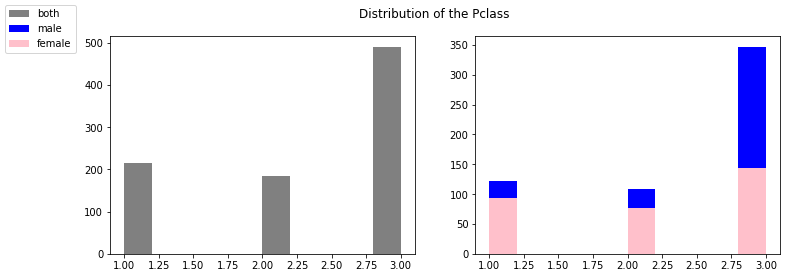

In [127]:
# You code here
from matplotlib import figure

# Distribution of the 'Pclass'
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle('Distribution of the Pclass')

ax1.hist(
    data['Pclass'],
    color='gray',
    label='both'
)

# Distributions of the 'Pclass' separately for men and women
ax2.hist(
    data[male_pattern]['Pclass'],
    color='blue',
    label='male'
)
ax2.hist(
    data[female_pattern]['Pclass'],
    color='pink',
    label='female'
)

fig.legend(loc='upper left')


# Amount of men from the second class onboard
class2_men = len(data[ male_pattern & (data['Pclass'] == 2) ])
print(f'{class2_men=}')

**3. What are median and standard deviation of `Fare`?. Round to two decimals.**

In [128]:
fare_median = data['Fare'].median()
fare_std = data['Fare'].std()

print(f'{fare_median=:.2f}')
print(f'{fare_std=:.2f}')

fare_median=14.45
fare_std=49.69


**4. Is that true that the mean age of survived people is higher than that of passengers who eventually died?**

In [129]:
# You code here
survived_pattern = (data['Survived'] == 1)
died_pattern = (data['Survived'] == 0)

mean_survived = data[survived_pattern]['Age'].mean()
mean_died = data[died_pattern]['Age'].mean()

print(f'{mean_survived=:.2f}')
print(f'{mean_died=:.2f}')
print(f'Answer: {mean_survived > mean_died}')

mean_survived=28.34
mean_died=30.63
Answer: False


**5. Is that true that passengers younger than 30 y.o. survived more frequently than those older than 60 y.o.? What are shares of survived people among young and old people?**

In [137]:
# You code here
young_pattern = data['Age'] < 30
old_pattern = data['Age'] > 60

young_survived = len(data[young_pattern & survived_pattern])
young_survived_share = young_survived / len(data[young_pattern])

old_survived = len(data[old_pattern & survived_pattern])
old_survived_share = old_survived / len(data[old_pattern])

print(f'Answer: {young_survived_share > old_survived_share}')

print(f'{young_survived_share=:.2%}')
print(f'{old_survived_share=:.2%}')

Answer: True
young_survived_share=40.62%
old_survived_share=22.73%


**6. Is that true that women survived more frequently than men? What are shares of survived people among men and women?**

In [144]:
# You code here
men_survived = len(data[male_pattern & survived_pattern])
men_survived_share = men_survived / len(data[male_pattern])

women_survived = len(data[female_pattern & survived_pattern])
women_survived_share = women_survived / len(data[female_pattern])

print(f'Answer: {women_survived_share > men_survived_share}')
print(f'{men_survived_share=:.2%}')
print(f'{women_survived_share=:.2%}')

Answer: True
men_survived_share=18.89%
women_survived_share=74.20%


**7. What's the most popular first name among male passengers?**

In [165]:
# You code here
data['First_name'] = data['Name'].apply(
    lambda name: name.split(',')[1].split()[1]
)
most_popular_male_name = data[male_pattern]['First_name'].mode()[0]

print(f'{most_popular_male_name=}')

most_popular_male_name='William'


**8. How is average age for men/women dependent on `Pclass`? Choose all correct statements:**

In [239]:
# You code here
# Which statements? ;d

for pclass in sorted(data['Pclass'].unique()):
    print(f'Pclass {pclass}:')

    mean_men_age = data[ male_pattern & (data['Pclass'] == pclass )]['Age'].mean()
    mean_women_age = data[ female_pattern & (data['Pclass'] == pclass )]['Age'].mean()

    print(f'\t{mean_men_age=:.2f}')
    print(f'\t{mean_women_age=:.2f}')


Pclass 1:
	mean_men_age=41.28
	mean_women_age=34.61
Pclass 2:
	mean_men_age=30.74
	mean_women_age=28.72
Pclass 3:
	mean_men_age=26.51
	mean_women_age=21.75
